<a href="https://colab.research.google.com/github/sarker2018/VIsaualisation/blob/main/python_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kernel Density Plot


### Stacked Density Chart

In [15]:
# Data overview

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


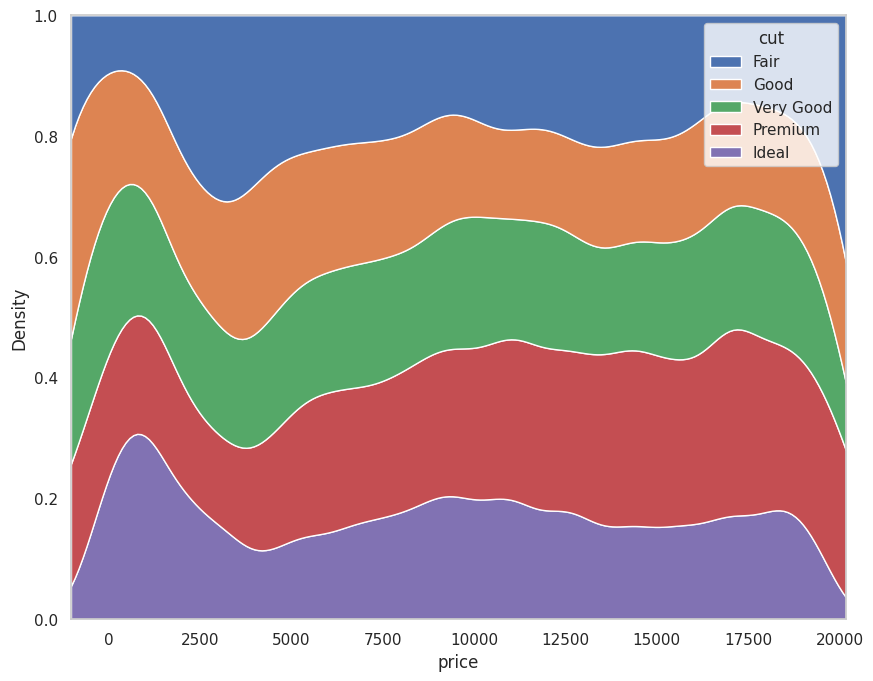

In [5]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds # dataset

# Set figure size
plt.figure(figsize=(10, 8), dpi=100)
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# stacked density plot
sns.kdeplot(data=diamonds, x="price", hue="cut", common_norm=False, multiple="fill", alpha=1)

# show the graph
plt.show()

### FacetGrids with Small Multiples

<Figure size 1200x960 with 0 Axes>

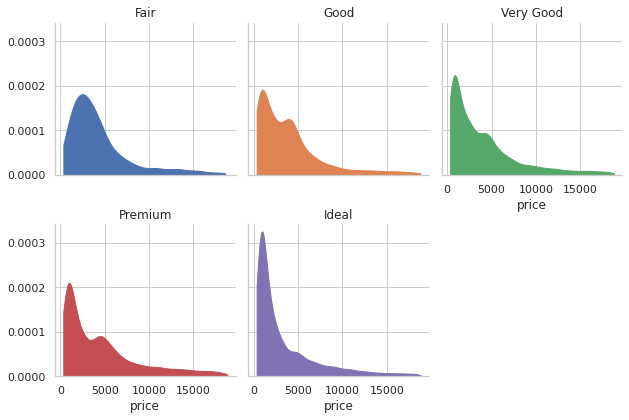

In [12]:

from plotnine.data import diamonds  # dataset


# Set figure size
plt.figure(figsize=(10, 8), dpi=120)
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(diamonds, col='cut', hue='cut', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"price", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

### Simple KDE with Transparency

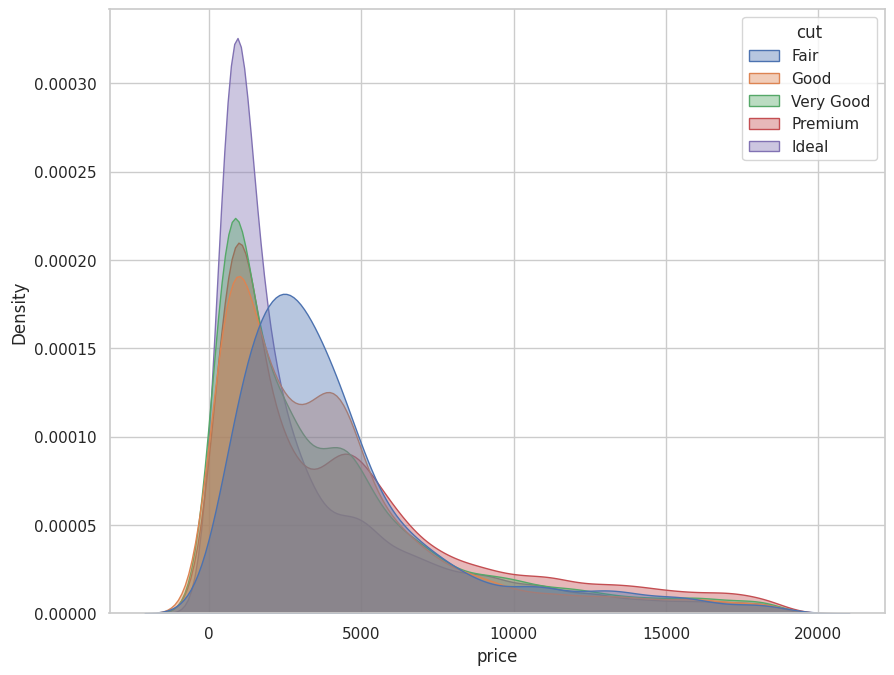

In [18]:
# Set figure size
plt.figure(figsize=(10, 8), dpi=100)
sns.kdeplot(data=diamonds, x="price", hue="cut", fill=True, common_norm=False, alpha=0.4)
plt.show()

### Density plot of two category

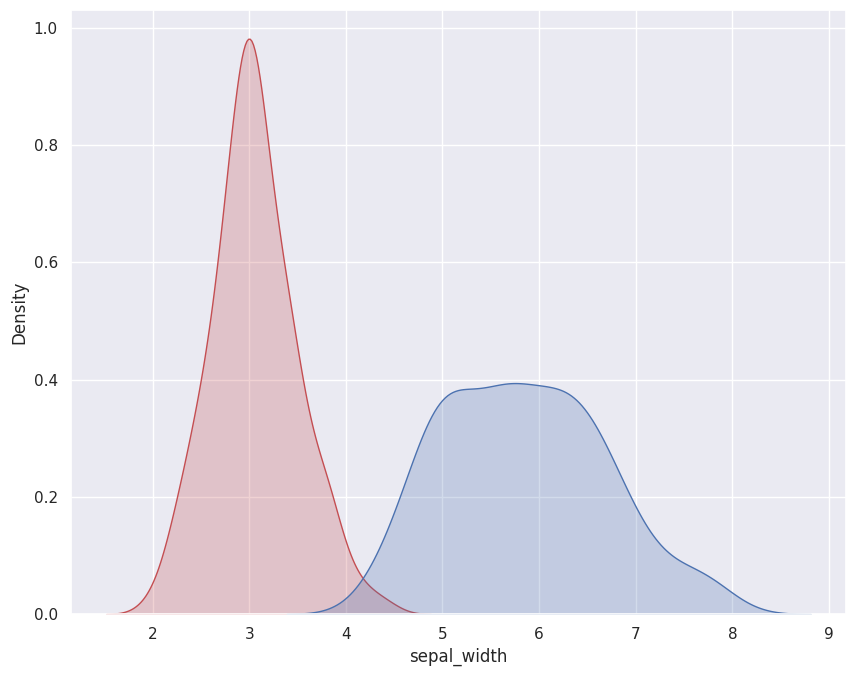

In [19]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# Load iris dataset
df = sns.load_dataset('iris')
# Set figure size
plt.figure(figsize=(10, 8), dpi=100)
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['sepal_width'], shade=True, color="r")
fig = sns.kdeplot(df['sepal_length'], shade=True, color="b")
plt.show()

## Histogram


### Animated Histogram

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-24-02f3f01d7efd>", line 23, in animate
    for count, rect in zip(n, bar_container.patches):
AttributeError: 'silent_list' object has no attribute 'patches'


AttributeError: ignored

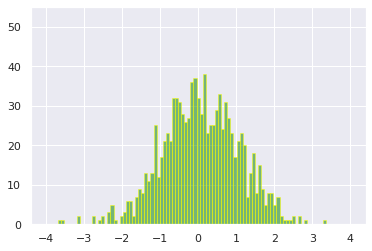

In [24]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)


def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate


fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
#plt.show()


from matplotlib import rc
rc('animation', html='jshtml')
ani

AttributeError: ignored

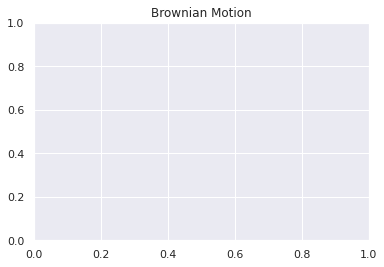

In [30]:
N=10
#val1 = 500

x=500*np.random.random(N)
y=500*np.random.random(N)

z=500*np.random.random(N)

def frame(w):
    ax.clear()

    global x,y,z
    x=x+np.random.normal(loc=0.0,scale=50.0,size=10)
    y=y+np.random.normal(loc=0.0,scale=50.0,size=10)
    z=z+np.random.normal(loc=0.0,scale=50.0,size=10)


    plt.title("Brownian Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim3d(-500.0,500.0)
    ax.set_ylabel('Y(t)')
    ax.set_ylim3d(-500.0,500.0)
    ax.set_zlabel('Z(t)')


    ax.set_zlim3d(-500.0,500.0) 

    plot=ax.scatter

    


    return plot


anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)
from matplotlib import rc
rc('animation', html='jshtml')
anim

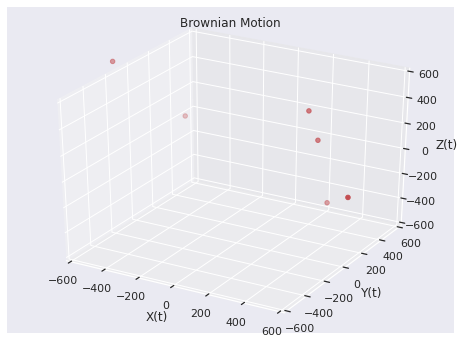

In [32]:
# Other Brownian Motion
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

N=10
val1 = 600

x=val1*np.random.random(N)
y=val1*np.random.random(N)
z=val1*np.random.random(N)

def frame(w):
    ax.clear()

    global x,y,z
    x=x+np.random.normal(loc=0.0,scale=50.0,size=10)
    y=y+np.random.normal(loc=0.0,scale=50.0,size=10)
    z=z+np.random.normal(loc=0.0,scale=50.0,size=10)


    plt.title("Brownian Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim3d(-val1,val1)
    ax.set_ylabel('Y(t)')
    ax.set_ylim3d(-val1,val1)
    ax.set_zlabel('Z(t)')
    ax.set_zlim3d(-val1,val1) 

    plot=ax.scatter3D(x, y, z, c='r')


    return plot

anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)

anim.save('BrowniamMotion.gif', writer = "pillow", fps=10 )
HTML(anim.to_html5_video())

## Multiple plots with Subplot